# Clustering Emisi Karbon & Kebakaran Hutan di Indonesia

Proyek ini bertujuan untuk mengelompokkan 33 provinsi di Indonesia berdasarkan:
- Luas hutan
- Jumlah kebakaran hutan (2018–2022)
- Jumlah emisi karbon (2018–2022)

Dengan pendekatan machine learning (unsupervised learning), model clustering  **KMeans** digunakan untuk mengidentifikasi pola wilayah dengan tingkat **emisi rendah**, **sedang**, dan **tinggi**.

## Tujuan
- Mendukung pengambilan keputusan berbasis data dalam pengelolaan hutan dan mitigasi perubahan iklim.
- Menunjukkan keterampilan dalam pembersihan data, normalisasi, clustering, dan visualisasi dalam konteks rekayasa data (Data Engineering).

## Tools & Teknologi
- Python
- Google Colab
- Pandas, scikit-learn, matplotlib, seaborn
- KMeans Clustering, PCA

## Hasil
- Visualisasi PCA dari hasil clustering
- Label kategori (Rendah, Sedang, Tinggi) untuk tiap provinsi
- Analisis alternatif: DBSCAN, Hierarchical, dan GMM dijelaskan sebagai opsi lanjutan

## Konteks Akademik
Proyek ini dikembangkan sebagai bagian dari tugas mata kuliah **Data Engineering**, dengan fokus pada:
- Transformasi dan eksplorasi data spasial-temporal
- Implementasi machine learning untuk klasifikasi tidak terawasi
- Penggabungan data lingkungan menjadi informasi yang bermakna



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Data/df_merge_singkat.csv')
df.head()
df.describe()

,Luas_Hutan_ha,Jumlah_Emisi_2018,Jumlah_Emisi_2019,Jumlah_Emisi_2020,Jumlah_Emisi_2021,Jumlah_Emisi_2022,jumlah_Kebakaran_Hutan_2018,jumlah_Kebakaran_Hutan_2019,jumlah_Kebakaran_Hutan_2020,jumlah_Kebakaran_Hutan_2021,jumlah_Kebakaran_Hutan_2022
count,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000
mean,4.871445e+06,4.925906e+06,1.888034e+07,1.210152e+06,1.399890e+06,7.118399e+05,16019.361515,49718.151515,8946.090909,10823.909091,6197.696970
std,5.843812e+06,1.119043e+07,4.743872e+07,2.402171e+06,3.051293e+06,1.395136e+06,26607.325097,84507.158138,20585.732285,28814.354352,13391.834288
min,9.107727e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.313230e+06,3.675200e+04,2.815200e+05,3.057600e+04,1.095200e+04,1.953700e+04,331.670000,2133.000000,569.000000,385.000000,328.000000
50%,3.130946e+06,5.065430e+05,8.850180e+05,2.531080e+05,1.627700e+05,1.605070e+05,2421.900000,9552.000000,2344.000000,1588.000000,1620.000000
75%,5.503841e+06,2.557810e+06,6.646052e+06,1.623911e+06,1.028498e+06,8.584240e+05,15156.220000,60234.000000,7646.000000,5411.000000,4915.000000
max,2.787490e+07,4.355416e+07,2.161338e+08,1.242300e+07,1.465201e+07,6.936347e+06,98637.990000,336798.000000,114719.000000,137343.000000,70637.000000


                     Provinsi Kategori_Emisi  Total_Emisi
0                      MALUKU         Rendah      7020795
1                MALUKU UTARA         Rendah       279160
2   KEPULAUAN BANGKA BELITUNG         Rendah      1620576
3                      BANTEN         Rendah         2557
4                   GORONTALO         Rendah       223929
5                 PAPUA BARAT         Rendah      4165853
6                  JAWA BARAT         Rendah      1536838
7                       PAPUA         Rendah     15561003
8              SULAWESI UTARA         Rendah       371185
9            SUMATERA SELATAN         Rendah    163876994
10             KEPULAUAN RIAU         Rendah      1455839
11                       RIAU         Tinggi    133224812
12             SULAWESI BARAT         Rendah       341443
13           SULAWESI SELATAN         Rendah      1124010
14                       ACEH         Rendah      2779357
15                       BALI         Rendah        95299
16            

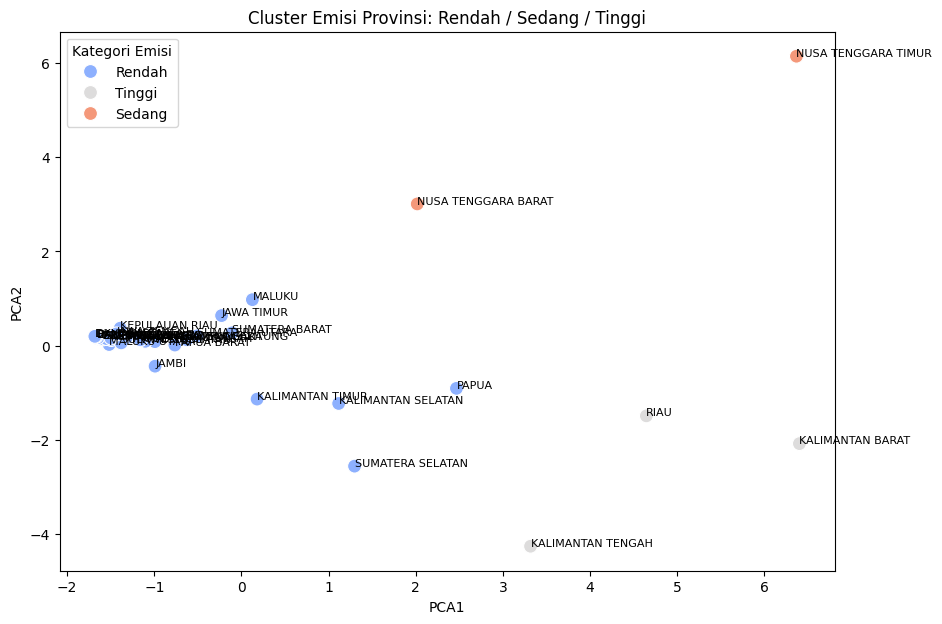

In [19]:
features = [
    'Luas_Hutan_ha',
    'jumlah_Kebakaran_Hutan_2018', 'jumlah_Kebakaran_Hutan_2019',
    'jumlah_Kebakaran_Hutan_2020', 'jumlah_Kebakaran_Hutan_2021',
    'jumlah_Kebakaran_Hutan_2022',
    'Jumlah_Emisi_2018', 'Jumlah_Emisi_2019',
    'Jumlah_Emisi_2020', 'Jumlah_Emisi_2021',
    'Jumlah_Emisi_2022'
]
X = df[features]

# 4. Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Clustering dengan 3 cluster rendah, sedang, tinggi
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Hitung total emisi per provinsi agar bisa menentukan label
df['Total_Emisi'] = df[['Jumlah_Emisi_2018', 'Jumlah_Emisi_2019', 'Jumlah_Emisi_2020',
                        'Jumlah_Emisi_2021', 'Jumlah_Emisi_2022']].sum(axis=1)

# 7. Tentukan nama label cluster berdasarkan rata-rata total emisi
cluster_emisi_avg = df.groupby('Cluster')['Total_Emisi'].mean().sort_values()
cluster_labels = {cluster_emisi_avg.index[0]: 'Rendah',
                  cluster_emisi_avg.index[1]: 'Sedang',
                  cluster_emisi_avg.index[2]: 'Tinggi'}

# 8. label kategori ke data
df['Kategori_Emisi'] = df['Cluster'].map(cluster_labels)

# 9.  hasil akhir
print(df[['Provinsi', 'Kategori_Emisi', 'Total_Emisi']])

# 10. Visualisasi  PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Kategori_Emisi', palette='coolwarm', s=100)
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['Provinsi'][i], fontsize=8)
plt.title("Cluster Emisi Provinsi: Rendah / Sedang / Tinggi")
plt.legend(title='Kategori Emisi')
plt.show()

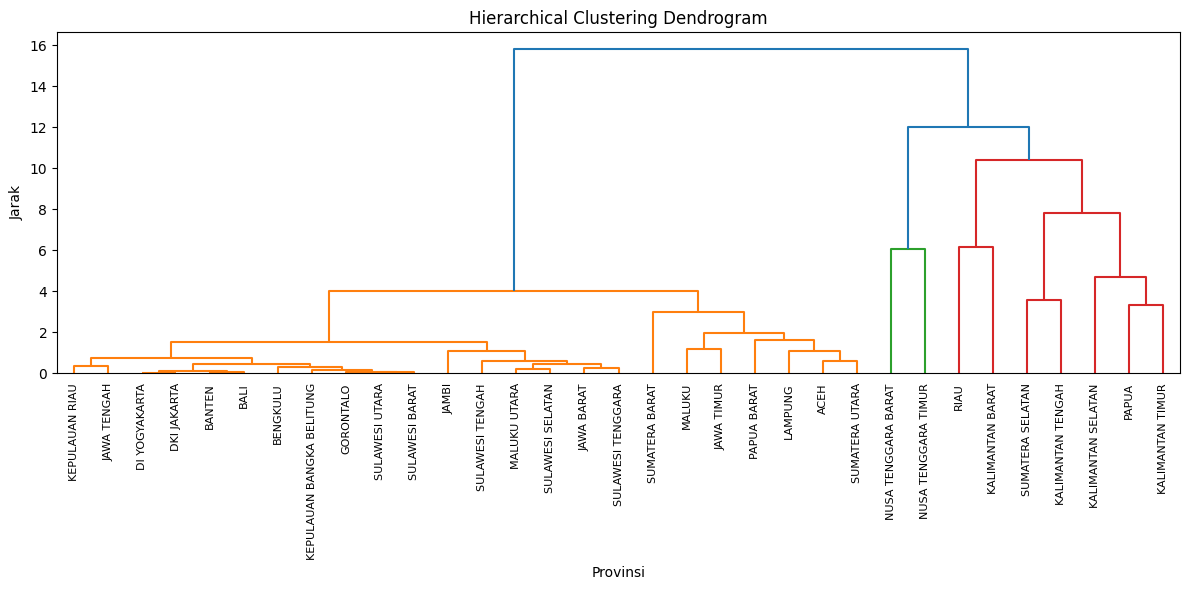

In [11]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df['Provinsi'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinsi')
plt.ylabel('Jarak')
plt.tight_layout()
plt.show()

In [14]:
db = DBSCAN(eps=1.5, min_samples=3)
df['Cluster_DBSCAN'] = db.fit_predict(X_scaled)

In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)